**Analyzing the Impact of User Metrics on Social Media Addiction**

*   We present a project to understand the impact of user-related variables on social media addiction
*  Includes a comparison of two predictive modeling methods: Xgboost and Multinomial Logistic Regression

In [ ]:
#Import dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/socialmedia.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


**Data Cleaning and Preparation**

First, we inspect whether there are missing values in our data (there are none). Then we create new variables for the purpose of exploring the trends in the data.

In [ ]:
import numpy as np
data = pd.DataFrame(data)
missing_values = data.isnull().sum().sum() #check for missing values
print('Number of missing values:',missing_values)
#Feature Engineering
data['Generation'] = np.where(data['Age']< 28,'Gen Z',np.where(data['Age']< 44,'Millennial',np.where(data['Age']< 60,'Gen X','Boomers'))) #we will mainly use this for data visualization
data['Watch Time as Integer'] = pd.to_datetime(data['Watch Time'], format='%I:%M %p').dt.strftime('%H%M').astype(int) #convert watch time to integer
data['Watch Time of Day'] = np.where(data['Watch Time as Integer']< 1200,'Morning',np.where(data['Watch Time as Integer']< 1800,'Afternoon',np.where(data['Watch Time as Integer']< 2400,'Evening','Night'))) #we will mainly use this for data visualization
data['Location'] = data['Location'].replace('Barzil','Brazil') #Fixing a typo in the data

Number of missing values: 0


**Exploratory Data Analysis: Insert Graphs and Visualizations here to understand trends in the data**

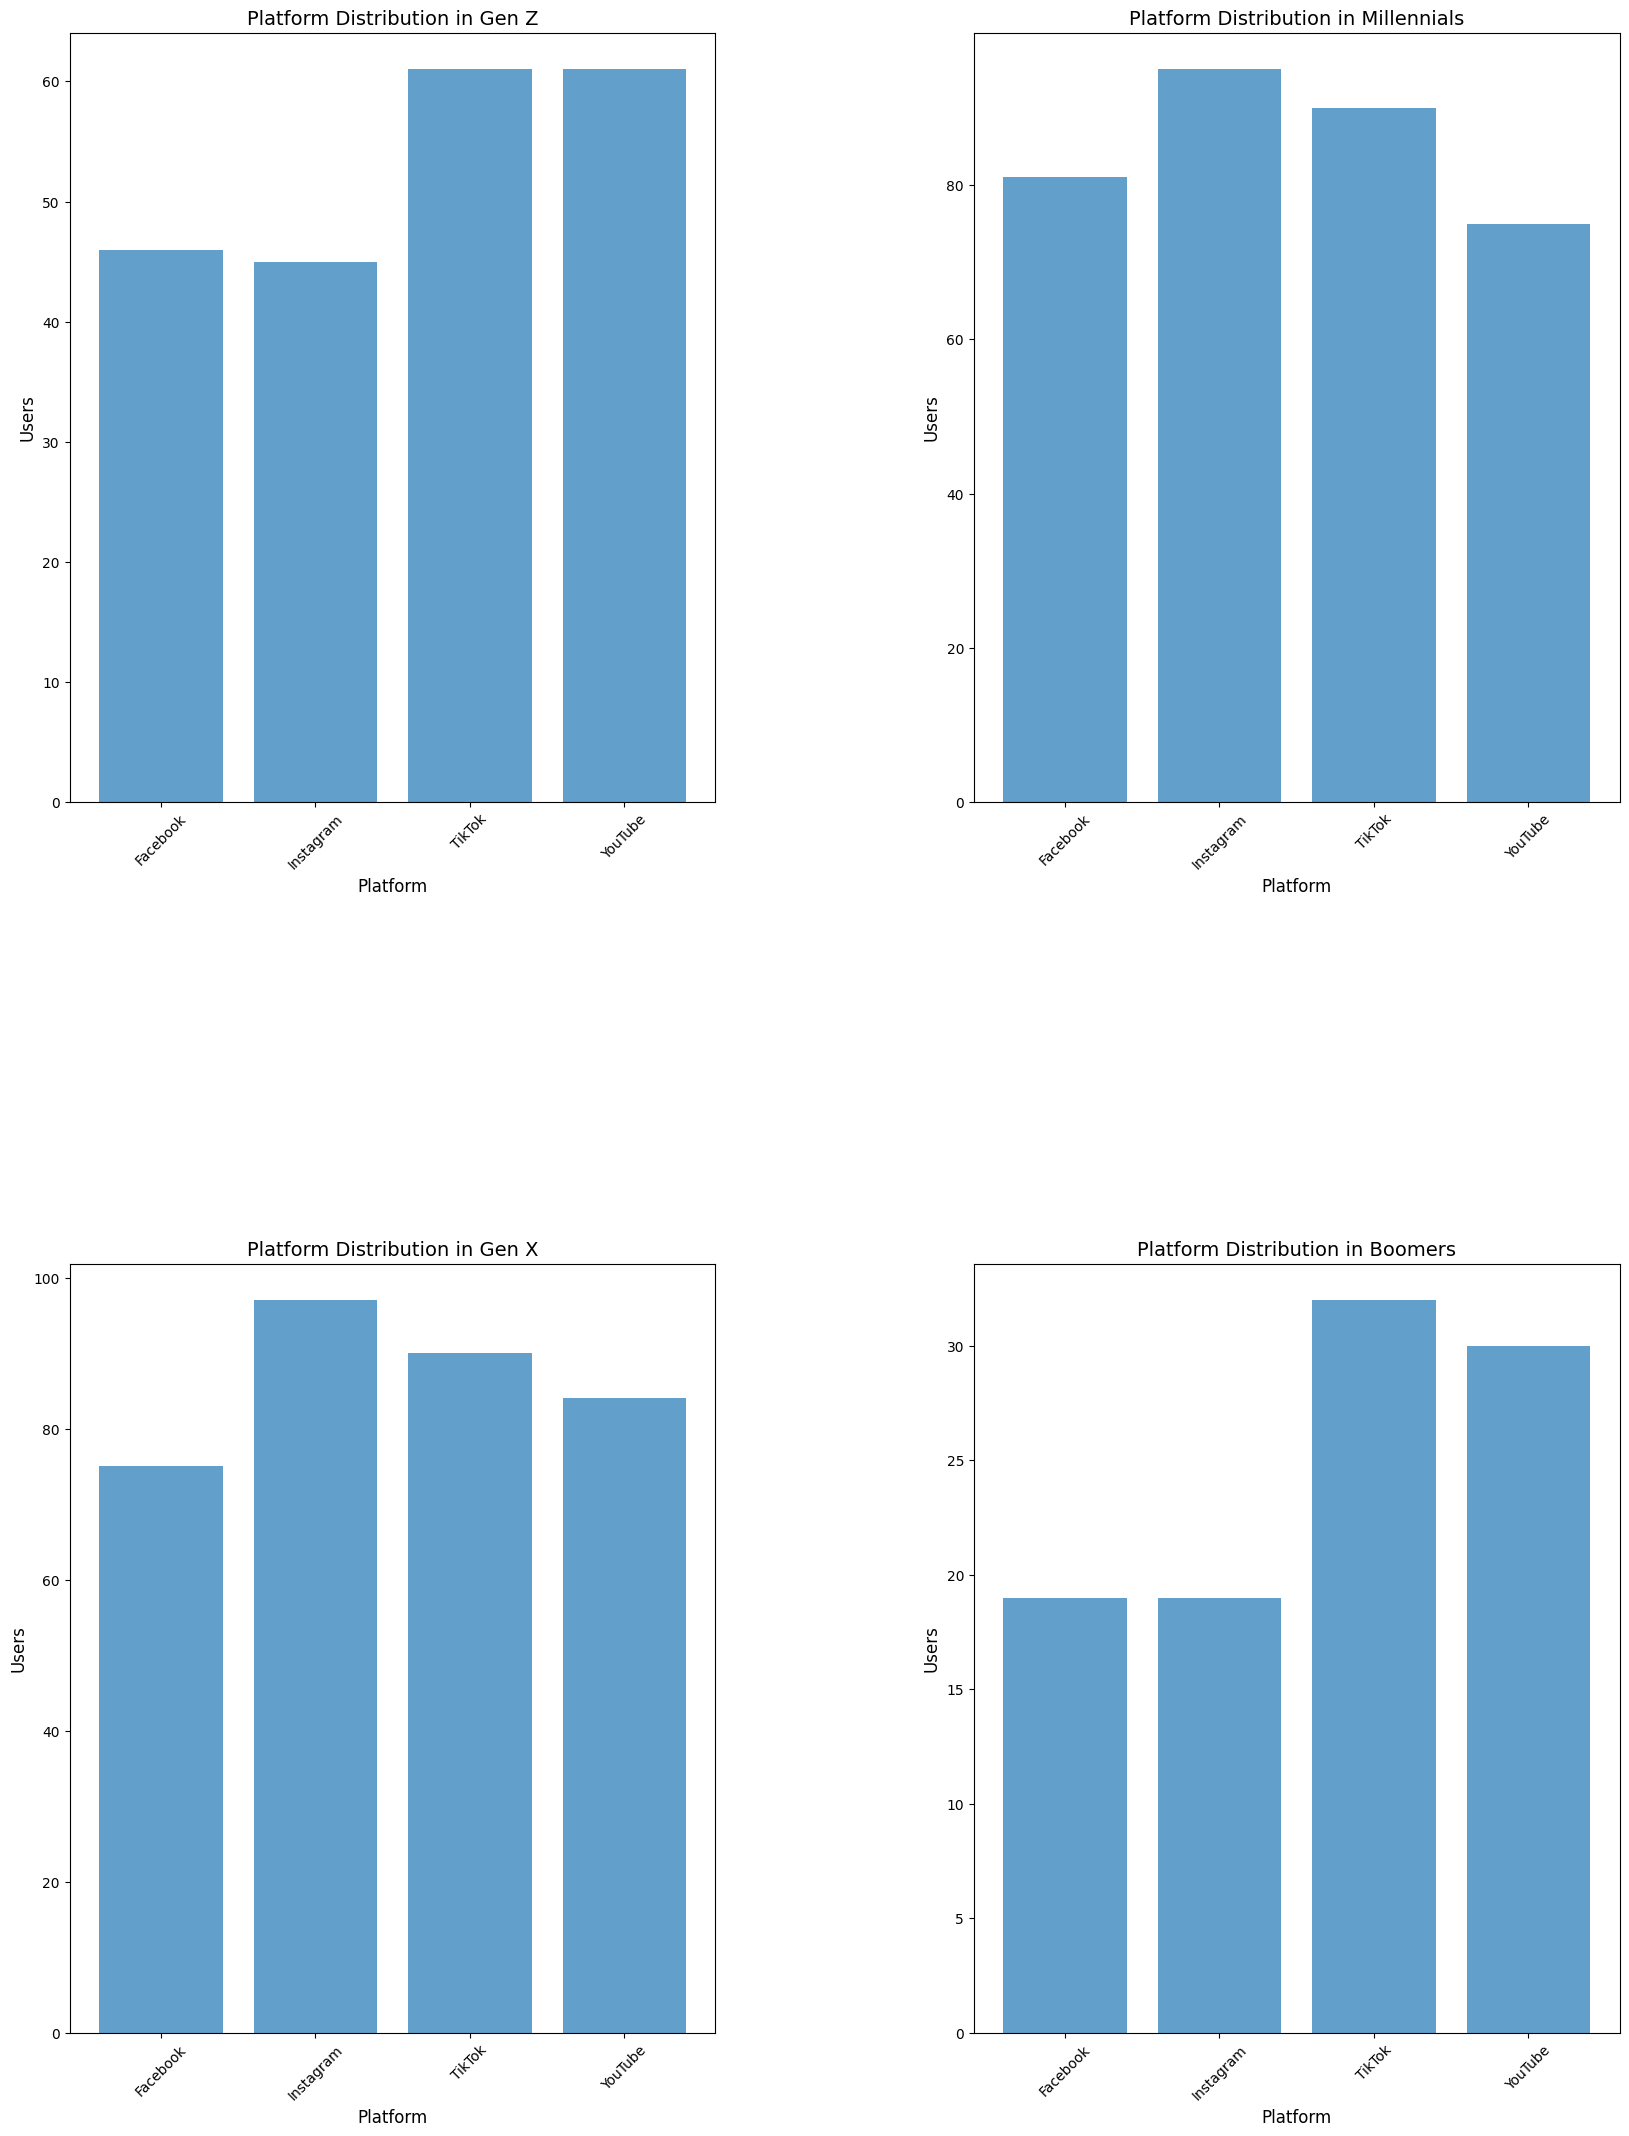

In [ ]:
import matplotlib.pyplot as plt
platform_order = ['Facebook', 'Instagram', 'TikTok', 'YouTube']
platform_counts_byGen = {
    'Gen Z': data[data['Generation'] == 'Gen Z'][['Platform']].value_counts()
    , 'Millennials': data[data['Generation'] == 'Millennial'][['Platform']].value_counts()
    , 'Gen X': data[data['Generation'] == 'Gen X'][['Platform']].value_counts()
    , 'Boomers': data[data['Generation'] == 'Boomers'][['Platform']].value_counts()
}

fig, axes = plt.subplots(2,2, figsize = (20,25))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.4, hspace=0.6)

for idx, (generation, counts) in enumerate(platform_counts_byGen.items()):
    row, col = divmod(idx, 2)
    values = [counts.get(platform,0) for platform in platform_order]
    axes[row, col].bar(platform_order, values, alpha=0.7)
    axes[row, col].set_title(f'Platform Distribution in {generation}', fontsize=14)
    axes[row, col].set_xlabel('Platform', fontsize=12)
    axes[row, col].set_ylabel('Users', fontsize=12)
    axes[row, col].set_xticks(range(len(platform_order)))
    axes[row, col].set_xticklabels(platform_order, rotation=45)

plt.show()


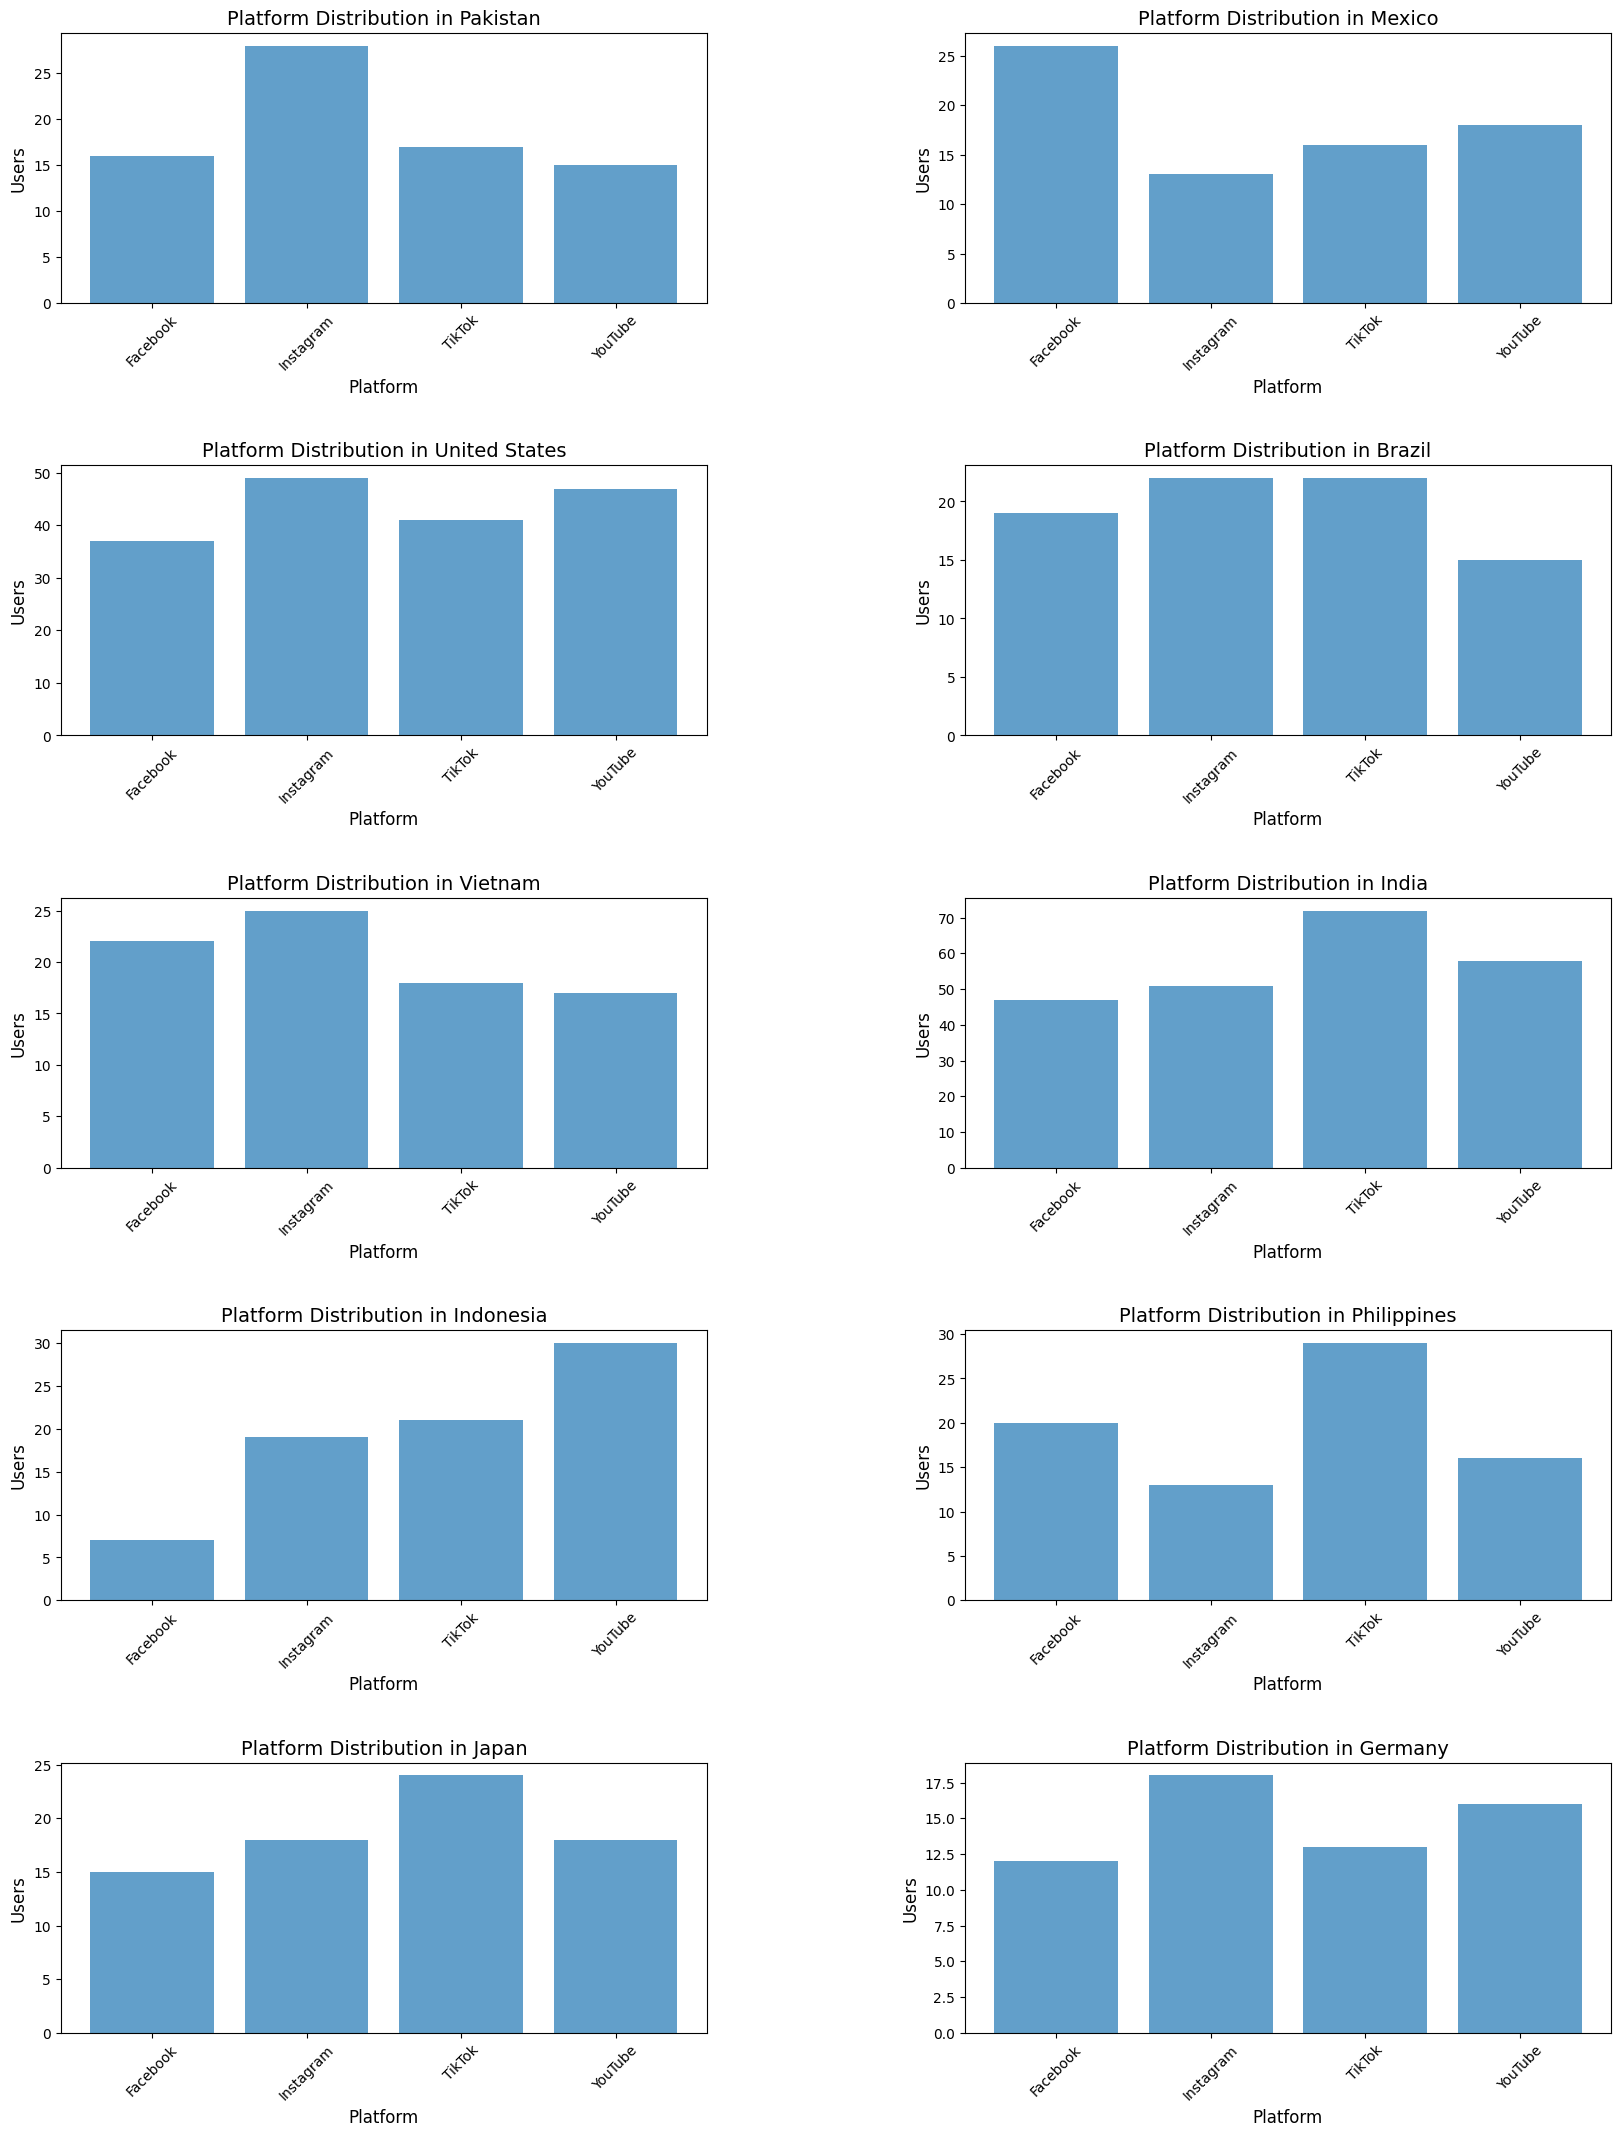

          Nation Most Frequent Platform
0       Pakistan           (Instagram,)
1         Mexico            (Facebook,)
2  United States           (Instagram,)
3         Brazil           (Instagram,)
4        Vietnam           (Instagram,)
5          India              (TikTok,)
6      Indonesia             (YouTube,)
7    Philippines              (TikTok,)
8          Japan              (TikTok,)
9        Germany           (Instagram,)


In [ ]:
platform_counts_byLoc = {
    'Pakistan': data[data['Location'] == 'Pakistan'][['Platform']].value_counts()
    ,'Mexico': data[data['Location'] == 'Mexico'][['Platform']].value_counts()
    ,'United States': data[data['Location'] == 'United States'][['Platform']].value_counts()
    ,'Brazil': data[data['Location'] == 'Brazil'][['Platform']].value_counts()
    ,'Vietnam': data[data['Location'] == 'Vietnam'][['Platform']].value_counts()
    ,'India': data[data['Location'] == 'India'][['Platform']].value_counts()
    ,'Indonesia': data[data['Location'] == 'Indonesia'][['Platform']].value_counts()
    ,'Philippines': data[data['Location'] == 'Philippines'][['Platform']].value_counts()
    ,'Japan': data[data['Location'] == 'Japan'][['Platform']].value_counts()
    ,'Germany': data[data['Location'] == 'Germany'][['Platform']].value_counts()
}

fig, axes = plt.subplots(5, 2, figsize = (20,25))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.4, hspace=0.6)

for idx, (country, counts) in enumerate(platform_counts_byLoc.items()):
    row, col = divmod(idx, 2)
    values = [counts.get(platform,0) for platform in platform_order]
    axes[row, col].bar(platform_order, values, alpha=0.7)
    axes[row, col].set_title(f'Platform Distribution in {country}', fontsize=14)
    axes[row, col].set_xlabel('Platform', fontsize=12)
    axes[row, col].set_ylabel('Users', fontsize=12)
    axes[row, col].set_xticks(range(len(platform_order)))
    axes[row, col].set_xticklabels(platform_order, rotation=45)

plt.show()

most_frequent_platform = {
    country: (counts.idxmax()) for country, counts in platform_counts_byLoc.items()
}

most_frequent_df = pd.DataFrame(
    most_frequent_platform.items(),
    columns=['Nation', 'Most Frequent Platform']
)

print(most_frequent_df)

As we can see from the plots above and from the summary, Instagram is the most popular platform in 6 countries, Facebook is the most popular platform in 1 country, TikTok is the most popular platform in 3 countries, and Youtube is the most popular platform in one country.

    Platform  Addiction Level
0   Facebook         2.977376
1  Instagram         2.960938
2     TikTok         2.912088
3    YouTube         2.780000


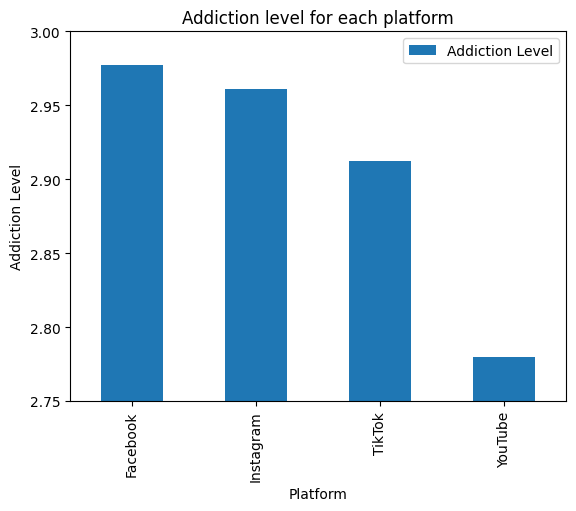

In [ ]:
import matplotlib.pyplot as plt
addiction_by_platform = data.groupby('Platform')['Addiction Level'].mean().reset_index()
addiction_by_platform.sort_values(by='Addiction Level',ascending=False)
addiction_by_platform.plot.bar(x='Platform', y='Addiction Level')
print(addiction_by_platform)
plt.xlabel('Platform')
plt.ylabel('Addiction Level')
plt.title('Addiction level for each platform')
plt.ylim(2.75,3.0)
plt.show()

The plot indicates that frequent users of Facebook have higher addiction levels when compared with other platforms.

Addiction levels do not vary greatly in our dataset, but we can see here that Facebook is the highest.

In [ ]:
#Create a visualization or table to show which platform is used most frequently by which generation
platform_in_GenZ = data[data['Generation'] == 'Gen Z'][['Platform']]
platform_in_millennial = data[data['Generation'] == 'Millennial'][['Platform']]
platform_in_GenX = data[data['Generation'] == 'Gen X'][['Platform']]
platform_in_boomers = data[data['Generation'] == 'Boomers'][['Platform']]

GenZ_freq = platform_in_GenZ['Platform'].value_counts().reset_index()
GenZ_freq.columns = ['Platform', 'Frequency']

Millennial_freq = platform_in_millennial['Platform'].value_counts().reset_index()
Millennial_freq.columns = ['Platform', 'Frequency']

GenX_freq = platform_in_GenX['Platform'].value_counts().reset_index()
GenX_freq.columns = ['Platform', 'Frequency']

Boomers_freq = platform_in_boomers['Platform'].value_counts().reset_index()
Boomers_freq.columns = ['Platform', 'Frequency']

most_frequent = {
    'Generation': ['Gen Z', 'Millennial', 'Gen X', 'Boomers'],
    'Most Used Platform': [
        GenZ_freq.iloc[0]['Platform'],
        Millennial_freq.iloc[0]['Platform'],
        GenX_freq.iloc[0]['Platform'],
        Boomers_freq.iloc[0]['Platform']
    ],
    'Frequency': [
        GenZ_freq.iloc[0]['Frequency'],
        Millennial_freq.iloc[0]['Frequency'],
        GenX_freq.iloc[0]['Frequency'],
        Boomers_freq.iloc[0]['Frequency']
    ]
}

most_frequent_df = pd.DataFrame(most_frequent)
print(most_frequent_df)

   Generation Most Used Platform  Frequency
0       Gen Z             TikTok         61
1  Millennial          Instagram         95
2       Gen X          Instagram         97
3     Boomers             TikTok         32


Ironically, the oldest generation and the youngest generation have the same most-used platform.

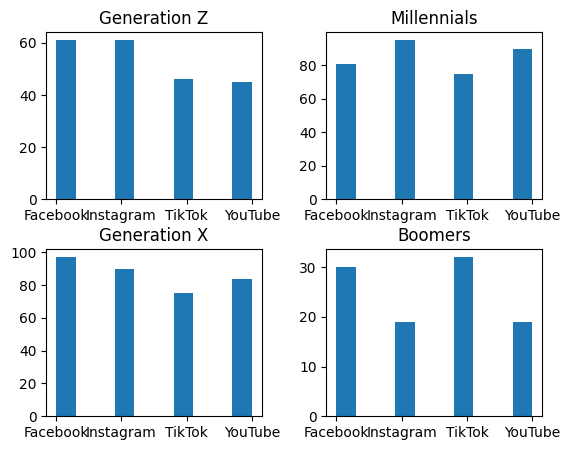

In [ ]:
platform_order = ['Facebook', 'Instagram', 'TikTok', 'YouTube']

fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.3, hspace=0.3)
axes[0,0].hist(platform_in_GenZ)
axes[0,0].set_title('Generation Z')
axes[0,0].set_xticks(range(len(platform_order)))
axes[0,0].set_xticklabels(platform_order)

axes[0,1].hist(platform_in_millennial)
axes[0,1].set_title('Millennials')
axes[0,1].set_xticks(range(len(platform_order)))
axes[0,1].set_xticklabels(platform_order)

axes[1,0].hist(platform_in_GenX)
axes[1,0].set_title('Generation X')
axes[1,0].set_xticks(range(len(platform_order)))
axes[1,0].set_xticklabels(platform_order)

axes[1,1].hist(platform_in_boomers)
axes[1,1].set_title('Boomers')
axes[1,1].set_xticks(range(len(platform_order)))
axes[1,1].set_xticklabels(platform_order)
plt.show()

We can see from the plots above that Generation X uses Facebook more than any other generation. This is interesting considering the fact that addiction levels are higher among Facebook users.

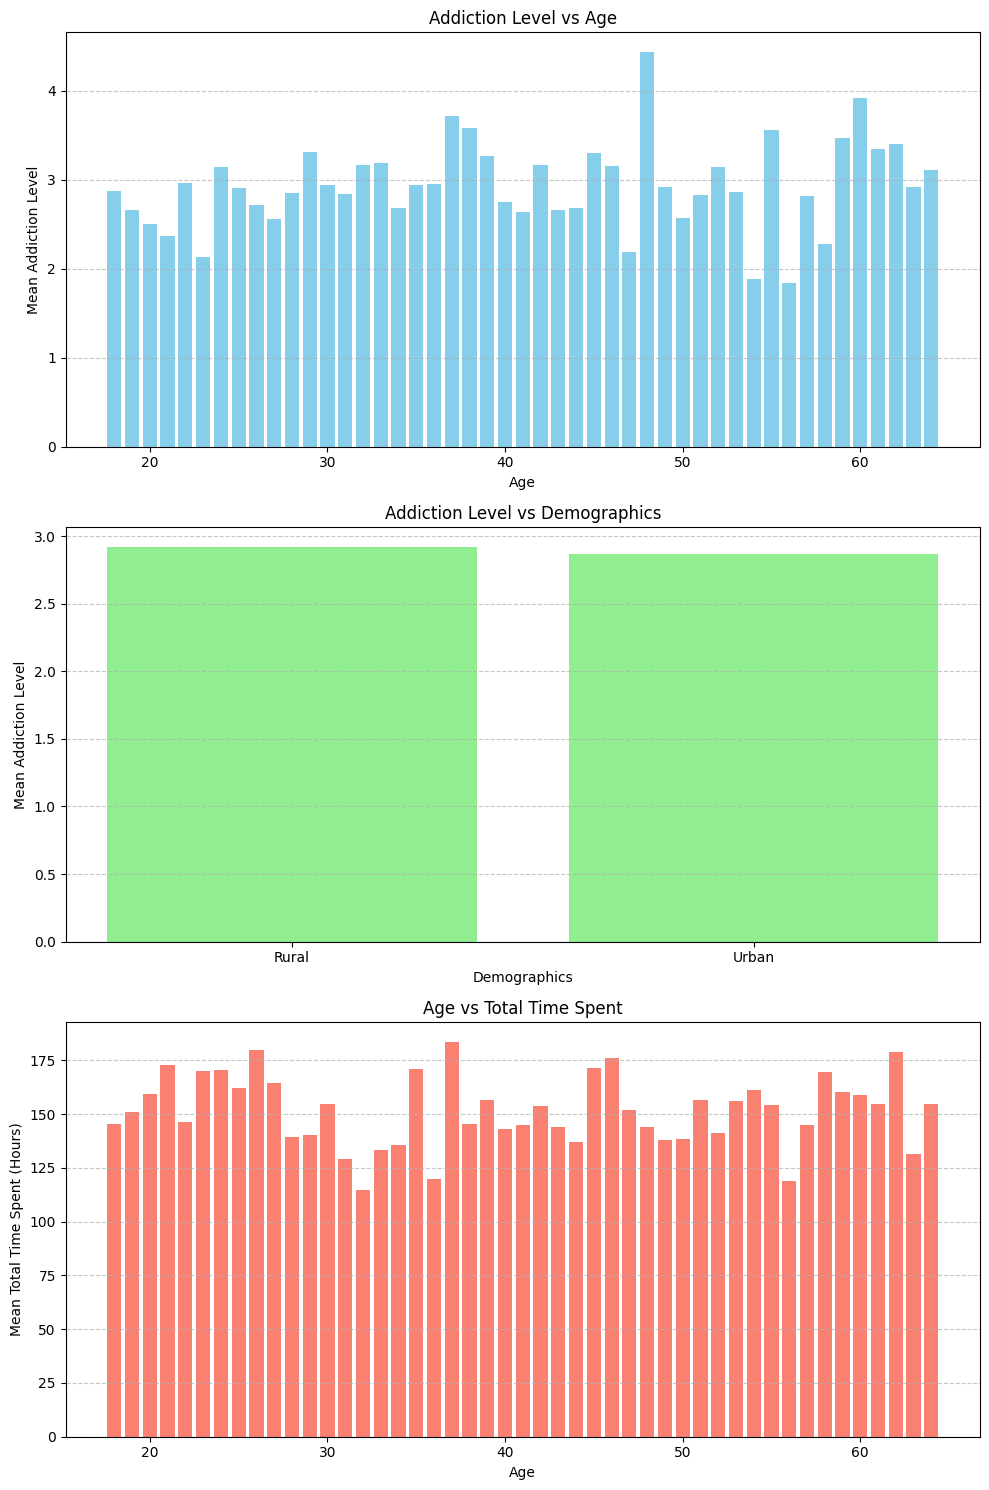

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Group data for plotting
age_grouped = data.groupby('Age')['Addiction Level'].mean()
demographics_grouped = data.groupby('Demographics')['Addiction Level'].mean()
time_spent_by_age = data.groupby('Age')['Total Time Spent'].mean()

#Create subplots for the three plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#Plot 1: Addiction Level vs Age
axes[0].bar(age_grouped.index, age_grouped.values, color='skyblue')
axes[0].set_title('Addiction Level vs Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Mean Addiction Level')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

#Plot 2: Addiction Level vs Demographics
axes[1].bar(demographics_grouped.index, demographics_grouped.values, color='lightgreen')
axes[1].set_title('Addiction Level vs Demographics')
axes[1].set_xlabel('Demographics')
axes[1].set_ylabel('Mean Addiction Level')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

#Plot 3: Age vs Total Time Spent
axes[2].bar(time_spent_by_age.index, time_spent_by_age.values, color='salmon')
axes[2].set_title('Age vs Total Time Spent')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Mean Total Time Spent (Hours)')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


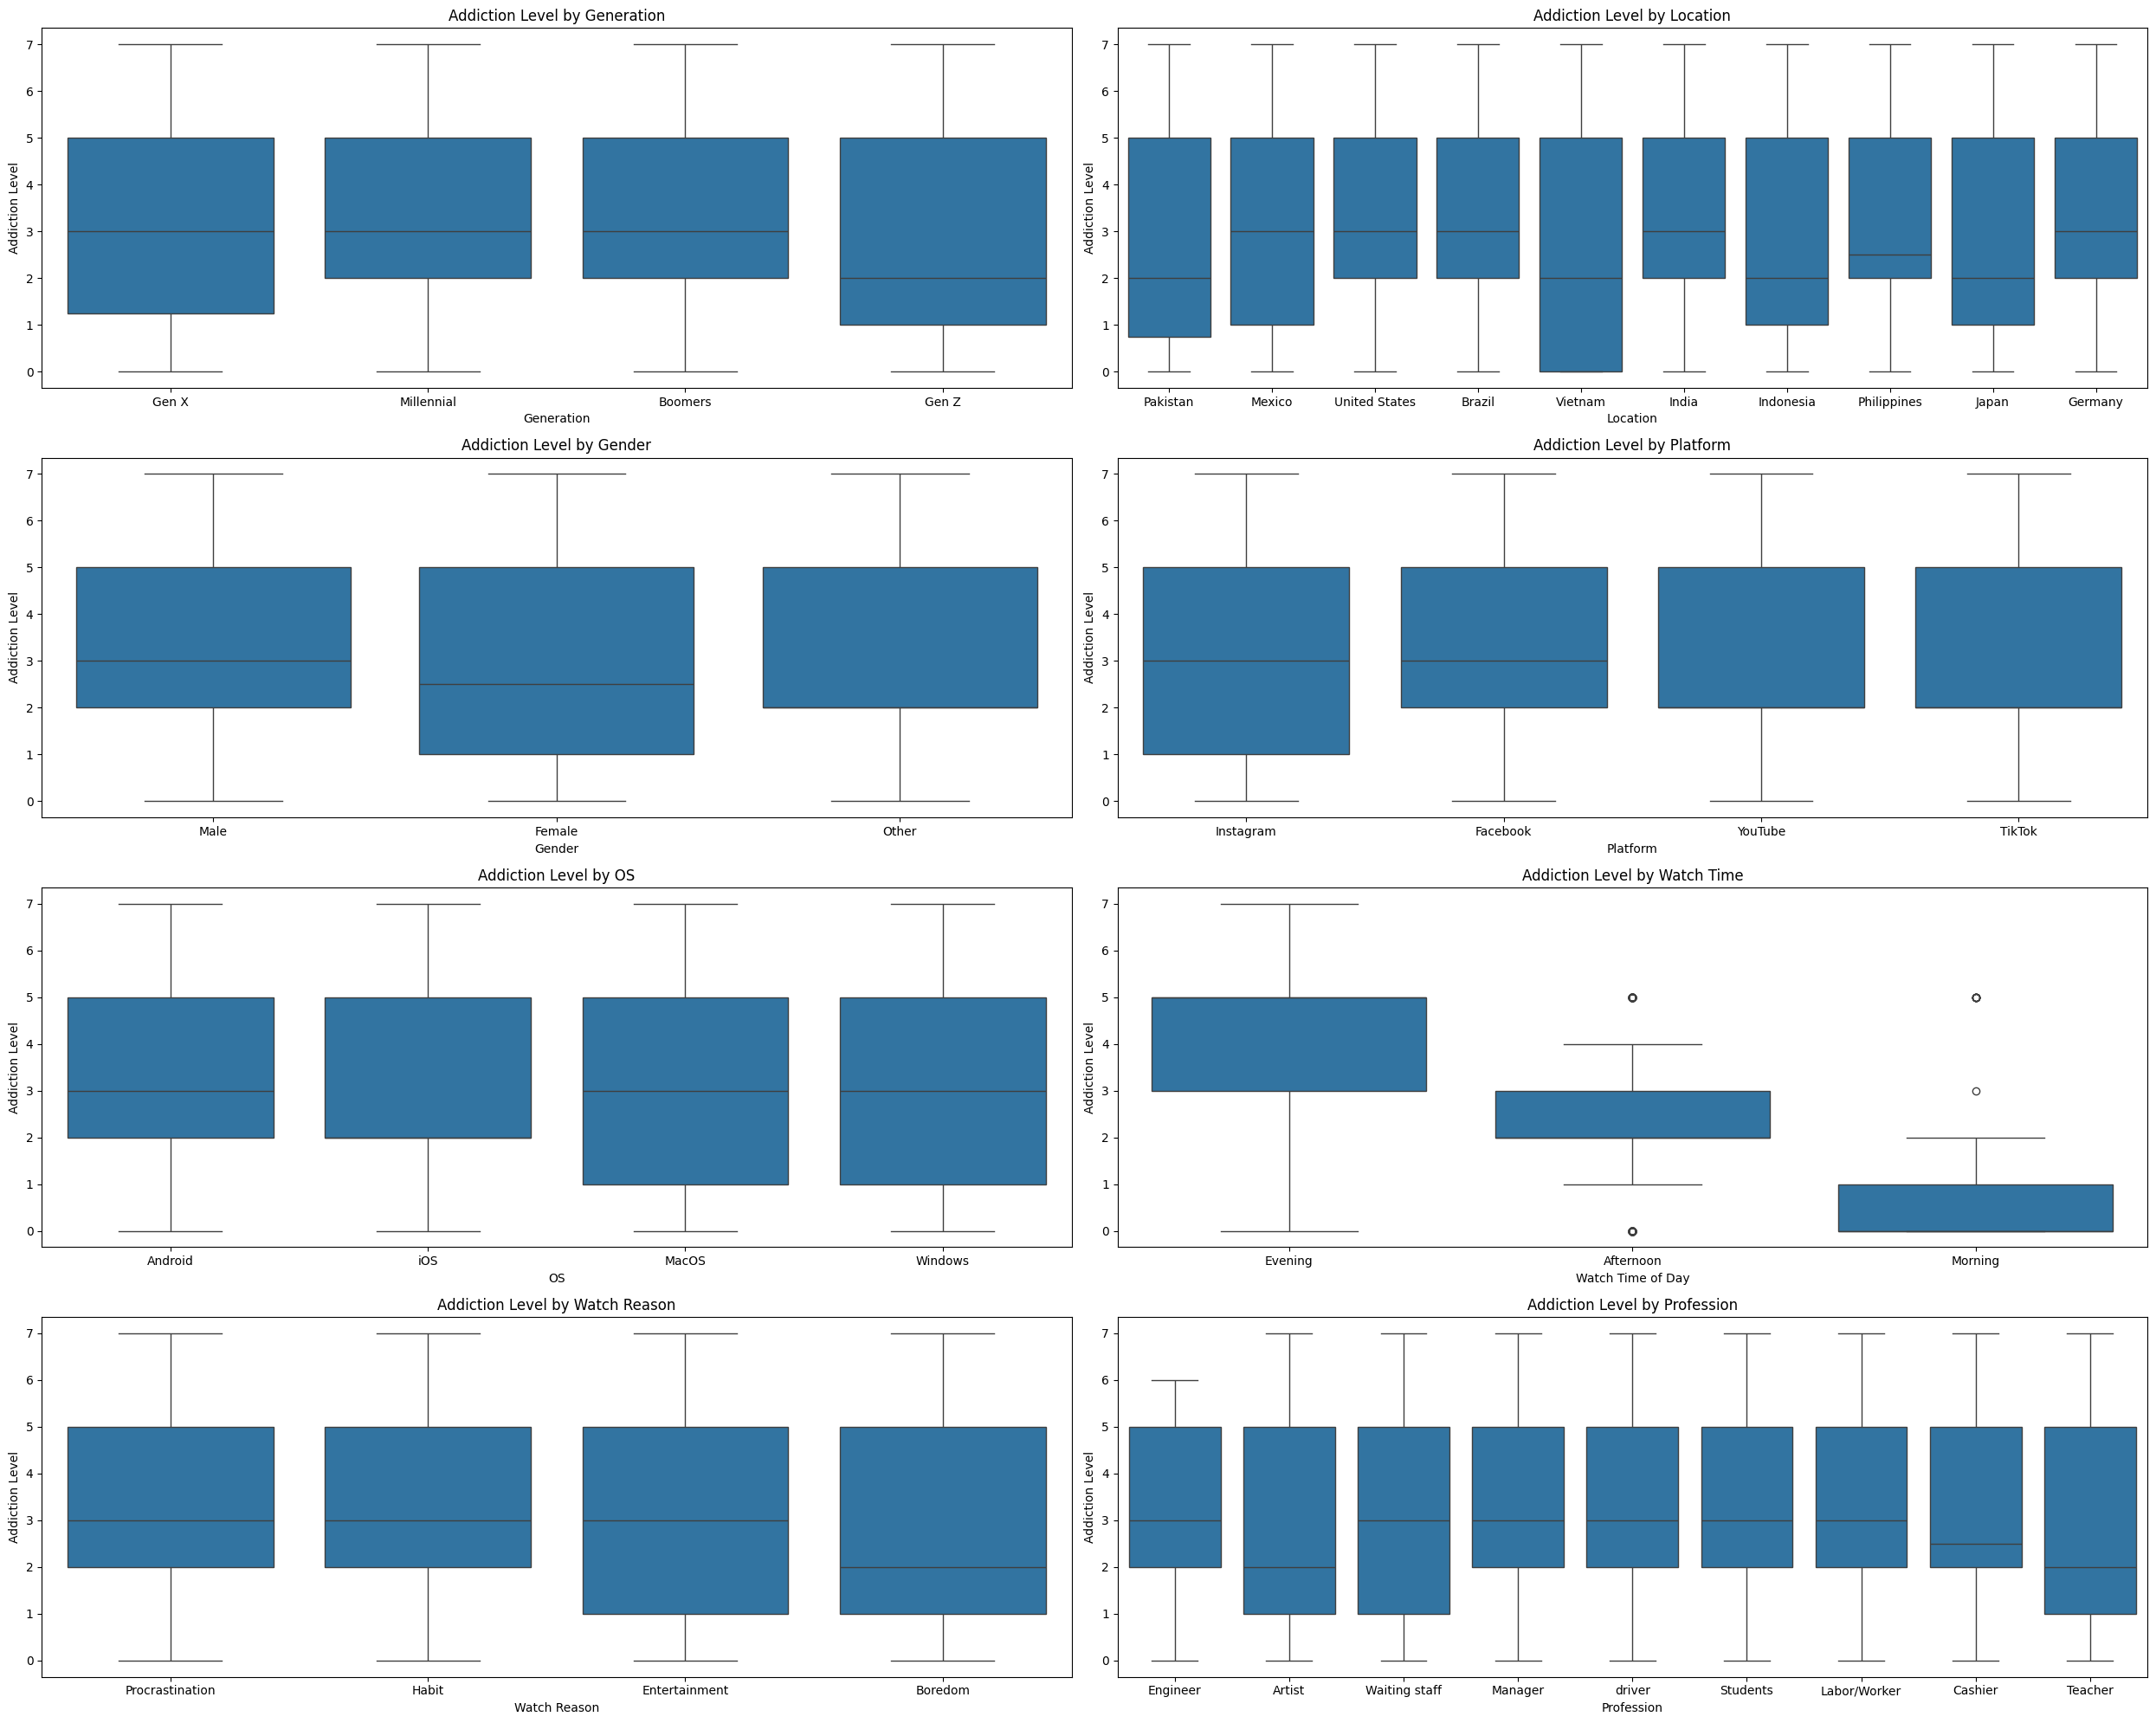

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(4, 2, figsize=(25, 20))  #Create a 4x2 grid for subplots

sns.boxplot(x='Generation', y='Addiction Level', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Addiction Level by Generation')

sns.boxplot(x='Location', y='Addiction Level', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Addiction Level by Location')

sns.boxplot(x='Gender', y='Addiction Level', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Addiction Level by Gender')

sns.boxplot(x='Platform', y='Addiction Level', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Addiction Level by Platform')

sns.boxplot(x='OS', y='Addiction Level', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Addiction Level by OS')

sns.boxplot(x='Watch Time of Day', y='Addiction Level', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Addiction Level by Watch Time')

sns.boxplot(x='Watch Reason', y='Addiction Level', data=data, ax=axes[3, 0])
axes[3, 0].set_title('Addiction Level by Watch Reason')

sns.boxplot(x='Profession', y='Addiction Level', data=data, ax=axes[3, 1])
axes[3, 1].set_title('Addiction Level by Profession')

plt.tight_layout()
plt.show()


Finally, we observe the distributions of several relevant variables. It appears that the median addiction levels of Mexico, U.S., Brazil, India, and Germany are approximately equal. There also does no appear to be large differences in the distribution of addiction level of various professions.

In [ ]:
addiction_by_gen = data.groupby('Generation')['Addiction Level'].mean().reset_index()
addiction_by_gen.sort_values(by='Addiction Level', ascending = False)

,Generation,Addiction Level
0,Boomers,3.310000
3,Millennial,3.017595
1,Gen X,2.820809
2,Gen Z,2.676056


A surprising result from this dataset is that the oldest generation has the highest social media addiction level. It is possible that this is due to many Baby Boomers being of retirement age, and having more free time when compared with younger people.

In [ ]:
addiction_by_gender = data.groupby('Gender')['Addiction Level'].mean().reset_index()
addiction_by_gender.sort_values(by='Addiction Level',ascending=False)

,Gender,Addiction Level
1,Male,2.964981
0,Female,2.906832
2,Other,2.719512


Male addiction level is slightly higher than female addiction level. Those who fall in the 'Other' category have the lowest addiction level.

In [ ]:
addiction_by_demo = data.groupby('Demographics')['Addiction Level'].mean().reset_index()
addiction_by_demo.sort_values(by='Addiction Level',ascending=False)

,Demographics,Addiction Level
0,Rural,2.918231
1,Urban,2.870079


Rural addiction level is slightly higher than urban addiction level. Although not drastically different, this may indicate that people in rural areas experience less excitement in their daily lives than those that live close to cities.

In [ ]:
addiction_by_loc = data.groupby('Location')['Addiction Level'].mean().reset_index()
addiction_by_loc.sort_values(by='Addiction Level',ascending=False)

,Location,Addiction Level
0,Brazil,3.474359
1,Germany,3.135593
8,United States,3.011494
7,Philippines,2.948718
2,India,2.934211
5,Mexico,2.917808
3,Indonesia,2.779221
9,Vietnam,2.621951
6,Pakistan,2.552632
4,Japan,2.546667


Finally, we find the Brazil has the highest addiction level by a fairly large margin. A Google search indicates that most Brazilians use social media to connect with family or friends, and otherwise to read the news.

**Part 2: Demographic Influence on Addiction Level**
Approach: Analyze how Addiction Levels vary across different variables.
Use multinomial logistic regression.


In [ ]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize

#Select our columns of interest
data_to_use = data[['Addiction Level','Location','Gender','Profession','Age','Platform','OS','Watch Time','Watch Reason']]

#Create dummy variables for categorical variables
data_encoded = pd.get_dummies(data_to_use, columns=['Location','Gender','Profession','Age','Platform','OS','Watch Time','Watch Reason'],drop_first=True)


X = data_encoded.drop('Addiction Level',axis=1) #Predictor Variables
y = data_encoded['Addiction Level'] #Target Variable

#Split into 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#Add intercept term to training and test
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))


#Count the number of classes in Social
num_classes = len(np.unique(y))

#Convert the target to one-hot encoding for Multinomial Logistic Regression
y_train_one_hot = np.eye(num_classes)[y_train]

#Define the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  #Add for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

#Define the cost function
def multinomial_cost(theta,X,y_one_hot):
  m = len(y_one_hot)
  theta = theta.reshape(num_classes,X.shape[1])
  z = np.dot(X,theta.T)
  prob = softmax(z)
  cost = -1/m * np.sum(y_one_hot * np.log(prob))
  return cost

#Define the multinomial gradient
def multinomial_gradient(theta,X,y_one_hot):
  m = len(y_one_hot)
  theta = theta.reshape(num_classes,X.shape[1])
  z = np.dot(X,theta.T)
  prob = softmax(z)
  gradient = 1/m * np.dot((prob-y_one_hot).T,X)
  return gradient.flatten()

#Training the model using scipy.optimize.minimize
init_theta = np.zeros(num_classes * (X_train.shape[1]))

result = minimize(multinomial_cost,init_theta,args=(X_train,y_train_one_hot),method='L-BFGS-B',jac=multinomial_gradient,options={'maxiter':1000})

#Extract optimized parameter
theta_opt = result.x
theta_opt = theta_opt.reshape(num_classes,X_train.shape[1])

#Define a function to make predictions and return class with highest probability
def predict_class(X,theta):
  z = np.dot(X,theta.T)
  prob = softmax(z)
  return np.argmax(prob,axis=1)

y_pred_train = predict_class(X_train, theta_opt)
accuracy_train = np.mean(y_pred_train == y_train) * 100
print(f"Training Accuracy: {accuracy_train:.2f}%")

y_pred_test = predict_class(X_test, theta_opt)
accuracy_test = np.mean(y_pred_test == y_test) * 100
print(f"Test Accuracy: {accuracy_test:.2f}%")








Training Accuracy: 87.00%
Test Accuracy: 55.50%


The test accuracy indicates there is evidence of overtraining, and that the model does perform well on unseen data. We proceed with Xgboost to see if that method yields better results.

**Part 2: Demographic Influence on Addiction Level**
Approach: Analyze how Addiction Levels vary across different variables.
Use Random Forest.


Model Accuracy: 99.50%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         8
           2       0.98      1.00      0.99        41
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        18

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99       200



<Figure size 1000x800 with 0 Axes>

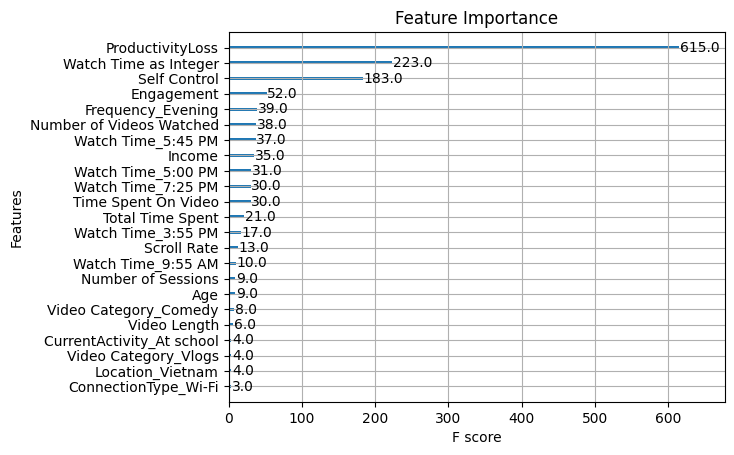

In [ ]:
import pandas as pd #import what we need
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt


data.dropna(inplace=True) #getting rid of rows with NA in them

useless_columns = ['UserID', 'Video ID']  #dropping columns that seem useless
data.drop(columns=useless_columns, inplace=True)

categorical_columns = data.select_dtypes(include=['object']).columns #this is selecting the categorical columns for later

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True) #using one-hot encoding to make categorical columns to numeric ones

X = data_encoded.drop(columns=['Addiction Level']) #dropping addiction level since we want to predict this
y = data_encoded['Addiction Level'] #putting it here since we want to predict this

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data into train and test sets

#initialize and train the XGBoost model
model = XGBClassifier(
    n_estimators=100,  #the amount of trees we will make
    learning_rate=0.1,  # how much to shrink the step size so we do not overfit
    max_depth=6,  #max depth of the trees
    random_state=42  # so we can reproduce the model
)

model.fit(X_train, y_train) #traing the model on our training data

y_pred = model.predict(X_test) #start to evalute our model, predicting the model on our test data

accuracy = accuracy_score(y_test, y_pred) #getting how accurate our model is
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:") #this gives us the classification report
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8)) #making a plot for us to see how important certain features/predictors are to the model
plot_importance(model, importance_type='weight', title="Feature Importance")
plt.show()